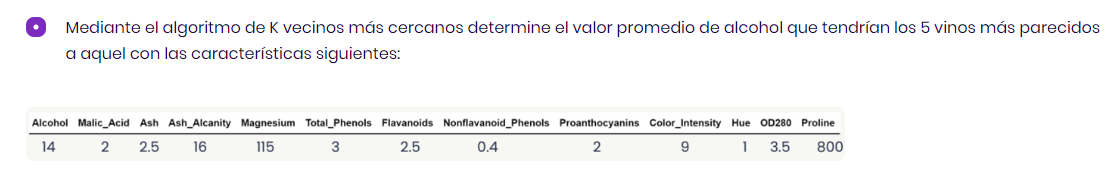

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
wine = pd.read_csv('C:/Users/Isaac/Desktop/IHD/EBAC DT/CIENCIA DE DATOS/M30 DS/wine-clustering.csv')
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
wine_arr = np.array(wine)
print(wine_arr)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [5]:
k = 3

# puntos a relacionar 

data = [14, 2, 2.5, 16, 115, 3, 2.5, 0.4, 2, 9, 1, 3.5, 800]

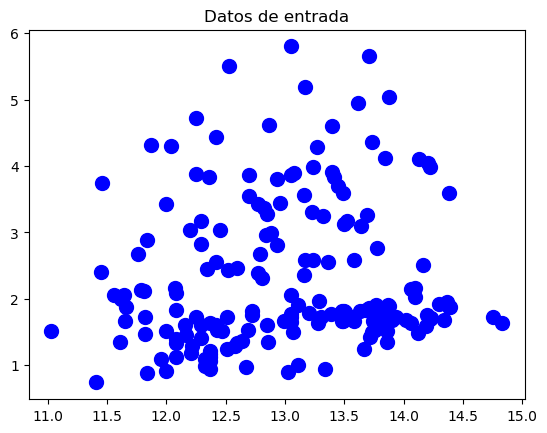

In [10]:
# visualizacion del apoblacion

plt.figure()
plt.title('Datos de entrada')
plt.scatter(wine_arr[:,0], wine_arr[:,1], marker = 'o', color = 'blue', s = 100)

In [11]:
# algorimto KNN
from sklearn.neighbors import NearestNeighbors
knn_model = NearestNeighbors(n_neighbors = k, algorithm = 'auto')
knn_model.fit(wine_arr)

# calculamos distancias e indices

distances, indices = knn_model.kneighbors([data])

In [13]:
print('K vecinos mas cercanos')
for i, index, in enumerate(indices[0][:k], start = 1):
    print(str(i) + ' is', wine_arr[index])

K vecinos mas cercanos
1 is [1.356e+01 1.710e+00 2.310e+00 1.620e+01 1.170e+02 3.150e+00 3.290e+00
 3.400e-01 2.340e+00 6.130e+00 9.500e-01 3.380e+00 7.950e+02]
2 is [1.406e+01 1.630e+00 2.280e+00 1.600e+01 1.260e+02 3.000e+00 3.170e+00
 2.400e-01 2.100e+00 5.650e+00 1.090e+00 3.710e+00 7.800e+02]
3 is [1.305e+01 2.050e+00 3.220e+00 2.500e+01 1.240e+02 2.630e+00 2.680e+00
 4.700e-01 1.920e+00 3.580e+00 1.130e+00 3.200e+00 8.300e+02]


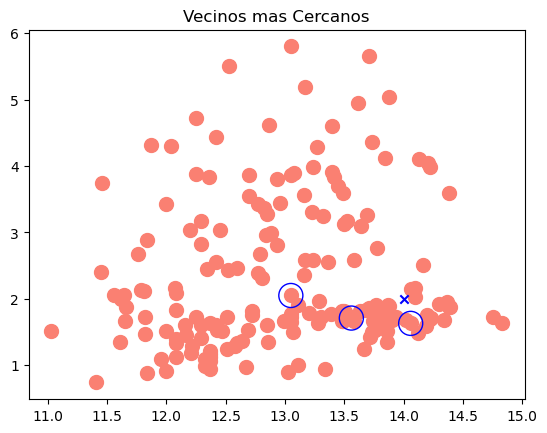

In [26]:
# visualización  puntos asociados a los puntos de interes
plt.figure()
plt.title('Vecinos mas Cercanos')
plt.scatter(wine_arr[:,0], wine_arr[:,1], marker ='o', color = 'salmon', s = 100)
plt.scatter(wine_arr[indices][0][:][:,0], wine_arr[indices][0][:][:,1], marker = 'o', s = 300,
            color = 'blue', facecolors = 'none')
plt.scatter(data[0], data[1], marker ='x', color = 'blue')
plt.show()

# Market basket

In [28]:
my_basket = [['bread','butter','wine','bananas','coffe','carrots'],
             ['tomatoes','onion','cheese','milk','potatoes'],
             ['beer','chips','asparagus','salsa','milk','apples'],
             ['olive oil','bread','butter','tomatoes','steak','carrots'],
             ['tomatoes','onion','chips','wine','ketchup','orange juice'],
             ['bread','butter','beer','chips','milk'],
             ['butter','tomatoes','carrots','coffe','sugar'],
             ['tomatoes','onion','cheese','milk','potatoes'],
             ['bread','butter','ketchup','coffe','chicken wings'],
             ['butter','beer','chips','asparagus','apples'],
             ['tomatoes','onion','beer','chips','milk','coffe']]

In [37]:
from mlxtend.preprocessing import TransactionEncoder

In [59]:
mb = TransactionEncoder()
mb_arr = mb.fit(my_basket).transform(my_basket)
df = pd.DataFrame(mb_arr, columns = mb.columns_)
df = df.astype(int)
df

,apples,asparagus,bananas,beer,bread,butter,carrots,cheese,chicken wings,chips,...,milk,olive oil,onion,orange juice,potatoes,salsa,steak,sugar,tomatoes,wine
0,0,0,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
2,1,1,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,1,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,1
5,0,0,0,1,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
8,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# algoritmo apriori
from mlxtend.frequent_patterns import apriori
articulos_frecuentes = apriori(df, min_support = 0.03, use_colnames = True)
articulos_frecuentes['length'] = articulos_frecuentes['itemsets'].apply(lambda x:len(x))
articulos_frecuentes

C:\Users\Isaac\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.181818,(apples),1
1,0.181818,(asparagus),1
2,0.090909,(bananas),1
3,0.363636,(beer),1
4,0.363636,(bread),1
...,...,...,...
385,0.090909,"(asparagus, beer, apples, chips, salsa, milk)",6
386,0.090909,"(bananas, wine, bread, carrots, butter, coffe)",6
387,0.090909,"(beer, tomatoes, onion, chips, coffe, milk)",6
388,0.090909,"(tomatoes, steak, olive oil, bread, carrots, b...",6


In [48]:
# reglas de asociacion
from mlxtend.frequent_patterns import association_rules

In [56]:
asso_rules = association_rules
asso_rules(articulos_frecuentes, metric = 'confidence', min_threshold = 0.5,).reset_index(drop = True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(asparagus),(apples),0.181818,0.181818,0.181818,1.0,5.500000,0.148760,inf,1.000000
1,(apples),(asparagus),0.181818,0.181818,0.181818,1.0,5.500000,0.148760,inf,1.000000
2,(beer),(apples),0.363636,0.181818,0.181818,0.5,2.750000,0.115702,1.636364,1.000000
3,(apples),(beer),0.181818,0.363636,0.181818,1.0,2.750000,0.115702,inf,0.777778
4,(apples),(butter),0.181818,0.545455,0.090909,0.5,0.916667,-0.008264,0.909091,-0.100000
...,...,...,...,...,...,...,...,...,...,...
2737,"(ketchup, orange juice)","(tomatoes, onion, chips, wine)",0.090909,0.090909,0.090909,1.0,11.000000,0.082645,inf,1.000000
2738,"(orange juice, chips)","(tomatoes, ketchup, onion, wine)",0.090909,0.090909,0.090909,1.0,11.000000,0.082645,inf,1.000000
2739,(wine),"(tomatoes, onion, ketchup, chips, orange juice)",0.181818,0.090909,0.090909,0.5,5.500000,0.074380,1.818182,1.000000
2740,(ketchup),"(wine, tomatoes, onion, chips, orange juice)",0.181818,0.090909,0.090909,0.5,5.500000,0.074380,1.818182,1.000000


In [57]:
asso_rules(articulos_frecuentes, metric = 'lift', min_threshold = 1.01,).reset_index(drop = True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(asparagus),(apples),0.181818,0.181818,0.181818,1.000000,5.500000,0.148760,inf,1.000000
1,(apples),(asparagus),0.181818,0.181818,0.181818,1.000000,5.500000,0.148760,inf,1.000000
2,(beer),(apples),0.363636,0.181818,0.181818,0.500000,2.750000,0.115702,1.636364,1.000000
3,(apples),(beer),0.181818,0.363636,0.181818,1.000000,2.750000,0.115702,inf,0.777778
4,(apples),(chips),0.181818,0.454545,0.181818,1.000000,2.200000,0.099174,inf,0.666667
...,...,...,...,...,...,...,...,...,...,...
3579,(tomatoes),"(wine, onion, ketchup, chips, orange juice)",0.545455,0.090909,0.090909,0.166667,1.833333,0.041322,1.090909,1.000000
3580,(onion),"(wine, tomatoes, ketchup, chips, orange juice)",0.363636,0.090909,0.090909,0.250000,2.750000,0.057851,1.212121,1.000000
3581,(ketchup),"(wine, tomatoes, onion, chips, orange juice)",0.181818,0.090909,0.090909,0.500000,5.500000,0.074380,1.818182,1.000000
3582,(chips),"(wine, tomatoes, onion, ketchup, orange juice)",0.454545,0.090909,0.090909,0.200000,2.200000,0.049587,1.136364,1.000000
